In [2]:
from uk_covid19 import Cov19API
import pandas as pd 
import numpy as np


In [3]:
#define filters with lists
lad=[
    'areaType=ltla'
]# all LADs

uk=[
    'areaType=overview'
]

england=[
    'areaType=nation',
    'areaName=England'
]

wales=[
    'areaType=nation',
    'areaName=Wales',
    
]

In [4]:
#define structure with a dictionary
cases_and_deaths={
    'date': 'date',
    'areaName': 'areaName',
    'areaCode': 'areaCode',
    'newCasesByPublishDate':'newCasesByPublishDate',
    'newPillarOneTestsByPublishDate':'newPillarOneTestsByPublishDate',
    'newPillarTwoTestsByPublishDate':'newPillarTwoTestsByPublishDate',
    'newPillarThreeTestsByPublishDate': 'newPillarThreeTestsByPublishDate',
    'newPillarFourTestsByPublishDate':'newPillarFourTestsByPublishDate',
    'newDeathsByDeathDate': 'newDeathsByDeathDate'

}

In [5]:
api_lad=Cov19API(filters=lad, structure=cases_and_deaths)

In [7]:
data_lad=api_lad.get_dataframe()

In [8]:
data_lad.head()

,date,areaName,areaCode,newCasesByPublishDate,newPillarOneTestsByPublishDate,newPillarTwoTestsByPublishDate,newPillarThreeTestsByPublishDate,newPillarFourTestsByPublishDate,newDeathsByDeathDate
0,2021-02-05,Aberdeen City,S12000033,20,None,None,None,None,NaN
1,2021-02-04,Aberdeen City,S12000033,23,None,None,None,None,NaN
2,2021-02-03,Aberdeen City,S12000033,18,None,None,None,None,NaN
3,2021-02-02,Aberdeen City,S12000033,20,None,None,None,None,NaN
4,2021-02-01,Aberdeen City,S12000033,22,None,None,None,None,NaN


# For the Excess deaths plot:

## Get week number column

In [9]:
data_lad['date'] = pd.to_datetime(data_lad['date'])
data_lad['Week_number'] = data_lad['date'].dt.week 

## Get weekly deaths

In [10]:
#get 2020 deaths only
lad_20= data_lad[data_lad['date'].between('2020-01-01', '2020-12-31')]
#Sum the deaths per week
lad_20_gp=lad_20.groupby(['areaName','areaCode','Week_number']).agg({'newDeathsByDeathDate': sum})
lad_20_gp.columns= ['weekly_deaths']
lad_20_gp=lad_20_gp.reset_index()
lad_20_gp.head()

,areaName,areaCode,Week_number,weekly_deaths
0,Aberdeen City,S12000033,1,0.0
1,Aberdeen City,S12000033,2,0.0
2,Aberdeen City,S12000033,3,0.0
3,Aberdeen City,S12000033,4,0.0
4,Aberdeen City,S12000033,5,0.0


In [11]:
import plotly 
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected =True)

In [12]:
excess=pd.read_csv('data/excess_deaths_uk_w51.csv')

In [13]:
excess.head()

,Area_Code,Area_Name,Week_Number,reg_deaths_15,reg_deaths_16,reg_deaths_17,reg_deaths_18,reg_deaths_19,avg_reg_deaths_15_19,reg_deaths_20,Excess_2020_from_avg,estimated_2019_pop,excess_deaths_per_100t_20
0,E06000001,Hartlepool,1,25,19,29,34,16,24.6,28,3.4,93663.0,3.630035
1,E06000001,Hartlepool,2,23,20,27,22,22,22.8,25,2.2,93663.0,2.348846
2,E06000001,Hartlepool,3,35,20,25,17,25,24.4,32,7.6,93663.0,8.114197
3,E06000001,Hartlepool,4,34,20,28,31,12,25.0,19,-6.0,93663.0,-6.405945
4,E06000001,Hartlepool,5,40,24,20,32,25,28.2,20,-8.2,93663.0,-8.754791


In [14]:
#checking that the Area names are the same:
print(len(excess['Area_Name'].unique()), len(lad_20_gp['areaName'].unique()))

337 380


In [15]:
#what are the differences?
l1=list(excess['Area_Code'].unique())
l2=list(lad_20_gp['areaCode'].unique())
diff=list(list(set(l1)-set(l2))+list(set(l2)-set(l1)))
print(diff)

['E06000053', 'W92000004', 'E09000001', 'E92000001', 'S12000035', 'S12000021', 'S12000036', 'S12000026', 'S12000034', 'S12000049', 'S12000039', 'N09000002', 'S12000013', 'N09000009', 'N09000008', 'E07000005', 'N09000006', 'S12000017', 'S12000045', 'S12000020', 'S12000050', 'N09000004', 'S12000019', 'S12000014', 'S12000040', 'S12000028', 'N09000010', 'S12000041', 'E07000004', 'S12000006', 'S12000048', 'S12000023', 'N09000001', 'E07000006', 'S12000027', 'S12000010', 'S12000047', 'S12000042', 'S12000030', 'N09000005', 'S12000018', 'S12000008', 'S12000033', 'N09000011', 'S12000038', 'N09000007', 'S12000011', 'N09000003', 'E07000007', 'S12000029', 'S12000005']


In [16]:
#mainly england and wales, so we do a left join
exc_lad=lad_20_gp.merge(excess[['Area_Code', 'Week_Number','Excess_2020_from_avg']], how='left', left_on=['areaCode', 'Week_number'], 
                        right_on=['Area_Code', 'Week_Number'])

In [17]:
def compare_deaths(lad):
    df=exc_lad[exc_lad['areaName'] == lad]
    trace0= go.Scatter(
    x=df['Week_number'],
    y=df['Excess_2020_from_avg'],
    mode='lines',
    name='Excess deaths from 2015-2019 average'
    )
    trace1=go.Scatter(
    x=df['Week_number'],
    y=df['weekly_deaths'],
    mode='lines',
    name='Covid-19 deaths')
    data=[trace0, trace1]
    layout=go.Layout(title={'text': f'Comparison between weekly excess Deaths and Covid-19 deaths in {lad} in 2020','y':0.9,'x':0.5,'xanchor': 'center',
            'yanchor': 'top'},
                     xaxis_title='Week number',
                    yaxis_title='Deaths',
                    font=dict(
            family="Helvetica",
            size=18,
            #color="blue"
                    ),
            plot_bgcolor='rgb(255,255,255)',
                     )
    fig=go.Figure(data=data, layout=layout)
    fig.update_xaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
    fig.update_yaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
    iplot(fig)

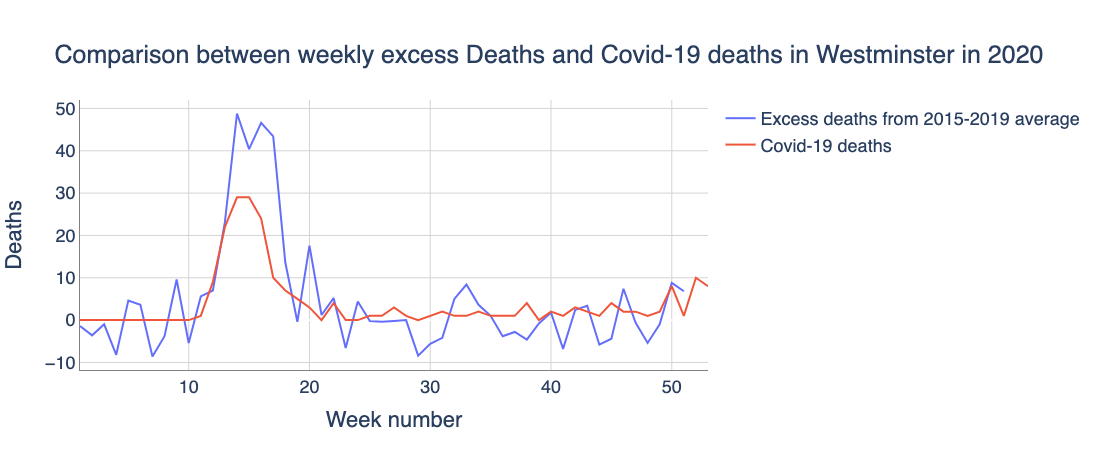

In [18]:
compare_deaths('Westminster')

# For the cases versus tests plot

## Get the total number of tests

In [19]:
pillar_cols = ['newPillarOneTestsByPublishDate', 'newPillarTwoTestsByPublishDate', 'newPillarThreeTestsByPublishDate', 'newPillarFourTestsByPublishDate' ]

In [20]:
#replace nan with 0
for col in pillar_cols:
    data_lad[col]=data_lad[col].replace(np.nan, 0)
        

In [21]:
#change type
data_lad[pillar_cols]=data_lad[pillar_cols].astype(float)

In [22]:
#sum all tests
data_lad['total_tests'] = np.sum(data_lad[pillar_cols], axis=1)
data_lad['normalised_cases'] = (data_lad['newCasesByPublishDate']/data_lad['total_tests'])*100

In [23]:
data_lad.head()

,date,areaName,areaCode,newCasesByPublishDate,newPillarOneTestsByPublishDate,newPillarTwoTestsByPublishDate,newPillarThreeTestsByPublishDate,newPillarFourTestsByPublishDate,newDeathsByDeathDate,Week_number,total_tests,normalised_cases
0,2021-02-05,Aberdeen City,S12000033,20,0.0,0.0,0.0,0.0,NaN,5,0.0,inf
1,2021-02-04,Aberdeen City,S12000033,23,0.0,0.0,0.0,0.0,NaN,5,0.0,inf
2,2021-02-03,Aberdeen City,S12000033,18,0.0,0.0,0.0,0.0,NaN,5,0.0,inf
3,2021-02-02,Aberdeen City,S12000033,20,0.0,0.0,0.0,0.0,NaN,5,0.0,inf
4,2021-02-01,Aberdeen City,S12000033,22,0.0,0.0,0.0,0.0,NaN,5,0.0,inf


In [24]:
#define function to plot the total tests versus the positive cases:
def get_plot_tests_positives(lad):
    
    df=data_lad[data_lad['areaName'] == lad]
    trace0=go.Scatter(
        x=df['date'],
        y=df['total_tests'],
        mode='lines',
        name='Total number of tests conducted',
    )

    trace1=go.Scatter(
        x=df['date'],
        y=df['newCasesByPublishDate'],
        mode='lines',
        name='New Cases by publish Date'   
    )

    data=[trace0, trace1]
    layout=go.Layout(title={'text': f'Covid-19 cases versus total number of tests conducted in {lad}','y':0.9,'x':0.5,'xanchor': 'center',
            'yanchor': 'top'},
                     xaxis_title='Date',
                    yaxis_title='Occurences',
                    font=dict(
            family="Helvetica",
            size=18,
            #color="blue"
                    ),
            plot_bgcolor='rgb(255,255,255)',
                     )
    fig=go.Figure(data=data, layout=layout)
    fig.update_xaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
    fig.update_yaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
    iplot(fig)


In [ ]:
data_lad['areaName'].unique()

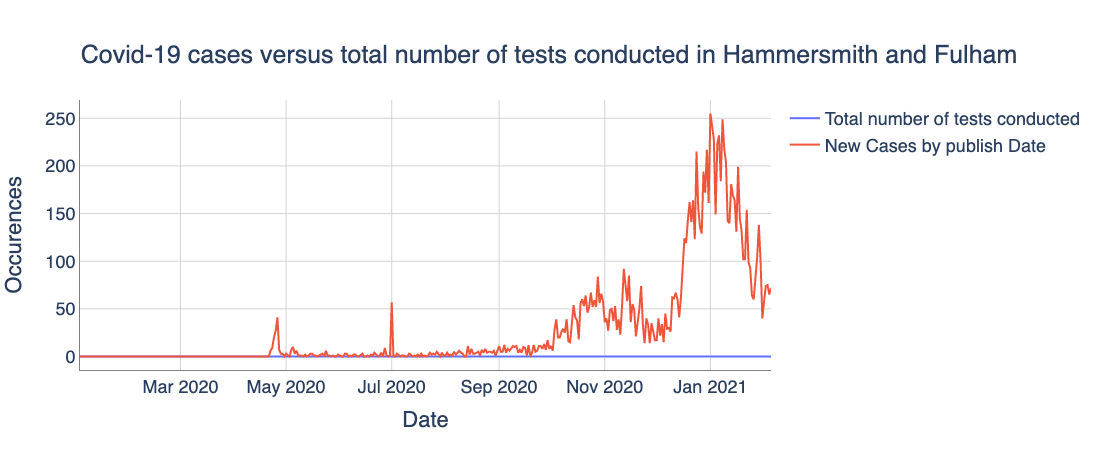

In [25]:
get_plot_tests_positives('Hammersmith and Fulham')

In [26]:
#plot England:
api_en=Cov19API(filters =england, structure=cases_and_deaths)
en=api_en.get_dataframe()
en.head()



,date,areaName,areaCode,newCasesByPublishDate,newPillarOneTestsByPublishDate,newPillarTwoTestsByPublishDate,newPillarThreeTestsByPublishDate,newPillarFourTestsByPublishDate,newDeathsByDeathDate
0,2021-02-05,England,E92000001,17314,NaN,NaN,NaN,None,NaN
1,2021-02-04,England,E92000001,18529,73475.0,650022.0,3004.0,None,257.0
2,2021-02-03,England,E92000001,17265,77273.0,652103.0,2996.0,None,613.0
3,2021-02-02,England,E92000001,15021,69710.0,484099.0,2579.0,None,732.0
4,2021-02-01,England,E92000001,16815,60414.0,544295.0,1931.0,None,819.0


In [27]:
#transform date column to date
en['date']=pd.to_datetime(en['date'])

In [28]:
#get the week number of the data
en['Week_number']=en['date'].dt.week

In [29]:
#get 2020 deaths only
en_2020= en[en['date'].between('2020-01-01', '2020-12-31')]
en_2020.head()

,date,areaName,areaCode,newCasesByPublishDate,newPillarOneTestsByPublishDate,newPillarTwoTestsByPublishDate,newPillarThreeTestsByPublishDate,newPillarFourTestsByPublishDate,newDeathsByDeathDate,Week_number
36,2020-12-31,England,E92000001,49510,63969.0,375375.0,2974.0,None,771.0,53
37,2020-12-30,England,E92000001,43554,67992.0,279017.0,2448.0,None,744.0,53
38,2020-12-29,England,E92000001,47164,53771.0,228615.0,1959.0,None,698.0,53
39,2020-12-28,England,E92000001,36511,48095.0,270010.0,642.0,None,705.0,53
40,2020-12-27,England,E92000001,25619,45330.0,273600.0,588.0,None,689.0,52


In [30]:
en_2020_gp=en_2020.groupby('Week_number').agg({'newDeathsByDeathDate': sum})
en_2020_gp.columns= ['weekly_deaths']
en_2020_gp=en_2020_gp.reset_index()
en_2020_gp.head()

,Week_number,weekly_deaths
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0


## How to normalise the cases per number of tests:

In [31]:
pillar_cols = ['newPillarOneTestsByPublishDate', 'newPillarTwoTestsByPublishDate', 'newPillarThreeTestsByPublishDate', 'newPillarFourTestsByPublishDate' ]

In [32]:
for col in pillar_cols:
    en[col]=en[col].replace(np.nan, 0)
        

In [33]:
en[pillar_cols]=en[pillar_cols].astype(float)

In [34]:
np.sum(en[pillar_cols], axis=1)

0           0.0
1      726501.0
2      732372.0
3      556388.0
4      606640.0
         ...   
395         0.0
396         0.0
397         0.0
398         0.0
399         0.0
Length: 400, dtype: float64

In [35]:
en['total_tests'] = np.sum(en[pillar_cols], axis=1)
en['normalised_cases'] = (en['newCasesByPublishDate']/en['total_tests'])*100

In [36]:
en.head()

,date,areaName,areaCode,newCasesByPublishDate,newPillarOneTestsByPublishDate,newPillarTwoTestsByPublishDate,newPillarThreeTestsByPublishDate,newPillarFourTestsByPublishDate,newDeathsByDeathDate,Week_number,total_tests,normalised_cases
0,2021-02-05,England,E92000001,17314,0.0,0.0,0.0,0.0,NaN,5,0.0,inf
1,2021-02-04,England,E92000001,18529,73475.0,650022.0,3004.0,0.0,257.0,5,726501.0,2.550444
2,2021-02-03,England,E92000001,17265,77273.0,652103.0,2996.0,0.0,613.0,5,732372.0,2.357409
3,2021-02-02,England,E92000001,15021,69710.0,484099.0,2579.0,0.0,732.0,5,556388.0,2.699735
4,2021-02-01,England,E92000001,16815,60414.0,544295.0,1931.0,0.0,819.0,5,606640.0,2.771825


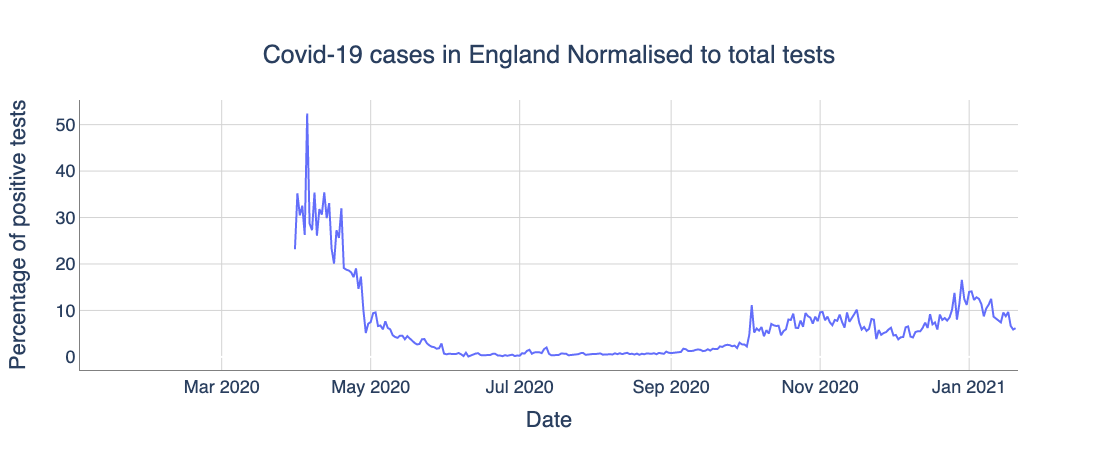

In [153]:

trace0=go.Scatter(
    x=en['date'],
    y=en['normalised_cases'],
    mode='lines',
    name='New Cases by publish Date'   
)

data=[trace0]
layout=go.Layout(title={'text': 'Covid-19 cases in England Normalised to total tests','y':0.9,'x':0.5,'xanchor': 'center',
        'yanchor': 'top'},
                 xaxis_title='Date',
                yaxis_title='Percentage of positive tests',
                font=dict(
        family="Helvetica",
        size=18,
        #color="blue"
                ),
        plot_bgcolor='rgb(255,255,255)',
                 )
fig=go.Figure(data=data, layout=layout)
fig.update_xaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
iplot(fig)

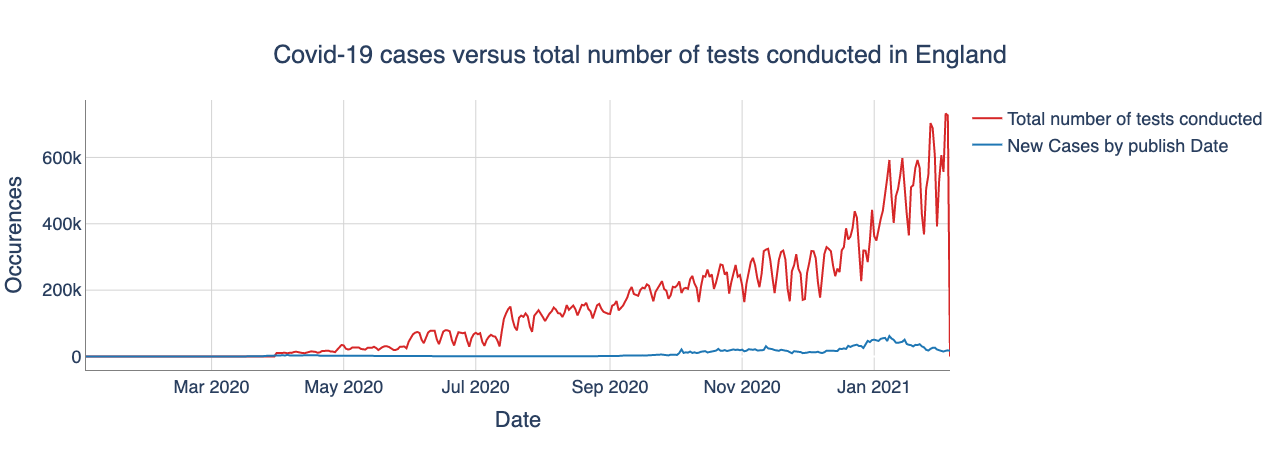

In [54]:
#without secondary axis:
fig=go.Figure()
fig.add_trace(go.Scatter(
    x=en['date'],
    y=en['total_tests'],
    mode='lines',
    name='Total number of tests conducted',
    line_color="#d62728")
    
    
)

fig.add_trace(go.Scatter(
    x=en['date'],
    y=en['newCasesByPublishDate'],
    mode='lines',
    name='New Cases by publish Date',
    line_color='#1f77b4')

)

fig.update_layout(title={'text': 'Covid-19 cases versus total number of tests conducted in England ','y':0.9,'x':0.5,'xanchor': 'center',
        'yanchor': 'top'},
                 xaxis_title='Date',
                yaxis_title='Occurences',
                font=dict(
        family="Helvetica",
        size=18,
        #color="blue"
                ),
        plot_bgcolor='rgb(255,255,255)',
                 )

fig.update_xaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.show()

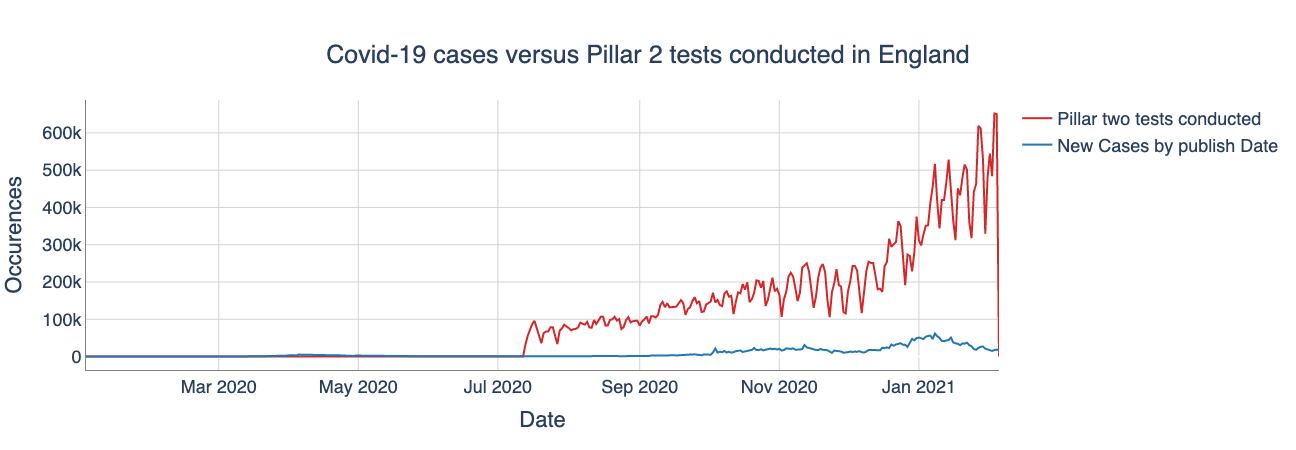

In [99]:
#with only pillar two tests:


fig=go.Figure()
fig.add_trace(go.Scatter(
    x=en['date'],
    y=en['newPillarTwoTestsByPublishDate'],
    mode='lines',
    name='Pillar two tests conducted',
    line_color="#d62728")
    
    
)

fig.add_trace(go.Scatter(
    x=en['date'],
    y=en['newCasesByPublishDate'],
    mode='lines',
    name='New Cases by publish Date',
    line_color='#1f77b4')

)

fig.update_layout(title={'text': 'Covid-19 cases versus Pillar 2 tests conducted in England ','y':0.9,'x':0.5,'xanchor': 'center',
        'yanchor': 'top'},
                 xaxis_title='Date',
                yaxis_title='Occurences',
                font=dict(
        family="Helvetica",
        size=18,
        #color="blue"
                ),
        plot_bgcolor='rgb(255,255,255)',
                 )

fig.update_xaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.show()

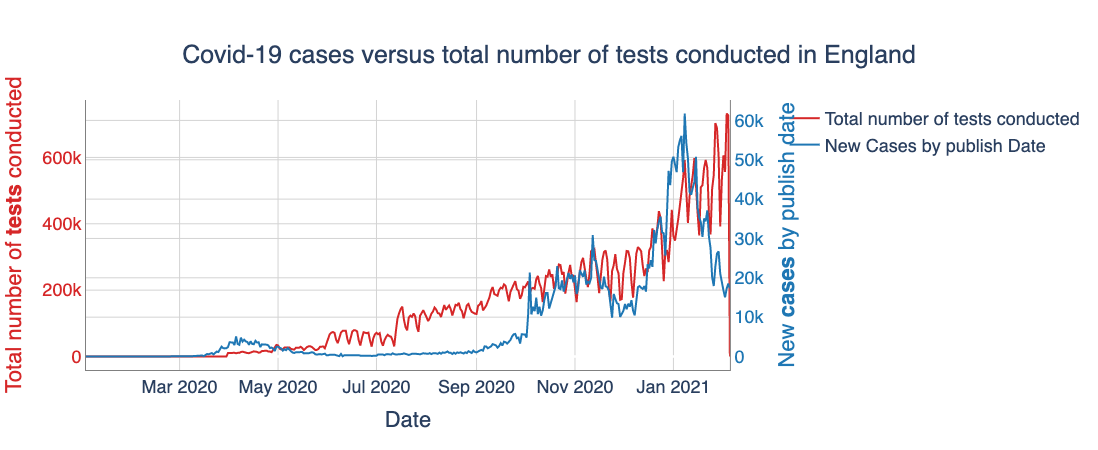

In [52]:
#with secondary axis
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(
    x=en['date'],
    y=en['total_tests'],
    mode='lines',
    name='Total number of tests conducted',
    line_color="#d62728"),
    secondary_y=False
    
    
)

fig.add_trace(go.Scatter(
    x=en['date'],
    y=en['newCasesByPublishDate'],
    mode='lines',
    name='New Cases by publish Date',
    line_color='#1f77b4'),
    secondary_y = 'Secondary'

)

fig.update_layout(title={'text': 'Covid-19 cases versus total number of tests conducted in England ','y':0.9,'x':0.5,'xanchor': 'center',
        'yanchor': 'top'},
                 xaxis_title='Date',
                yaxis_title='Occurences',
                font=dict(
        family="Helvetica",
        size=18,
        #color="blue"
                ),
        plot_bgcolor='rgb(255,255,255)',
                 )

fig.update_xaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.update_yaxes(
        title_text="Total number of <b>tests</b> conducted", 
        titlefont=dict(
            color="#d62728"
        ),
        tickfont=dict(
            color="#d62728"
        ),
        secondary_y=False)
fig.update_yaxes(
        title_text="New <b>cases</b> by publish date",
        titlefont=dict(
            color="#1f77b4"
        ),
        tickfont=dict(
            color="#1f77b4"
        ),
        
        secondary_y=True)

iplot(fig)

In [69]:
en.head()

,date,areaName,areaCode,newCasesByPublishDate,newPillarOneTestsByPublishDate,newPillarTwoTestsByPublishDate,newPillarThreeTestsByPublishDate,newPillarFourTestsByPublishDate,newDeathsByDeathDate,Week_number,total_tests,normalised_cases
0,2021-02-05,England,E92000001,17314,0.0,0.0,0.0,0.0,NaN,5,0.0,inf
1,2021-02-04,England,E92000001,18529,73475.0,650022.0,3004.0,0.0,257.0,5,726501.0,2.550444
2,2021-02-03,England,E92000001,17265,77273.0,652103.0,2996.0,0.0,613.0,5,732372.0,2.357409
3,2021-02-02,England,E92000001,15021,69710.0,484099.0,2579.0,0.0,732.0,5,556388.0,2.699735
4,2021-02-01,England,E92000001,16815,60414.0,544295.0,1931.0,0.0,819.0,5,606640.0,2.771825


In [75]:
#compute rolling average:
en['case_rolling_avg']=en.newCasesByPublishDate.rolling(7).mean()
en['death_rolling_avg']=en.newDeathsByDeathDate.rolling(7).mean()

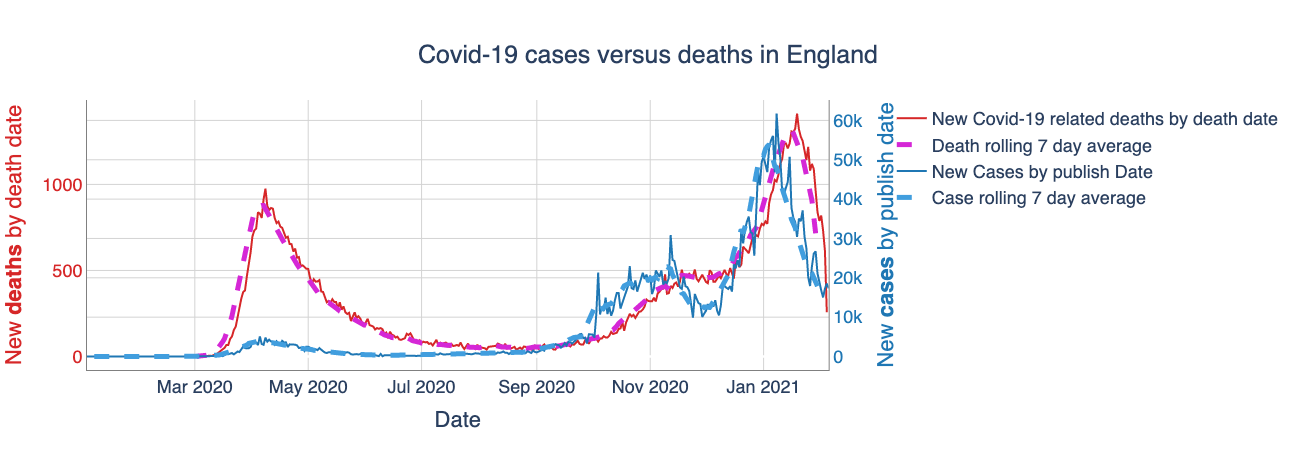

In [100]:
#Now with the cases versus deaths
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(
    x=en['date'],
    y=en['newDeathsByDeathDate'],
    mode='lines',
    name='New Covid-19 related deaths by death date',
    line_color="#d62728"),
    secondary_y=False   
)

#add rolling average:
fig.add_trace(go.Scatter(
    x=en['date'],
    y=en['death_rolling_avg'],
    name= 'Death rolling 7 day average',
    line=dict(color='#d527d6', width=5,
                              dash='dash')

),
    secondary_y=False         )

fig.add_trace(go.Scatter(
    x=en['date'],
    y=en['newCasesByPublishDate'],
    mode='lines',
    name='New Cases by publish Date',
    line_color='#1f77b4'),
    secondary_y = 'Secondary'

)
#add rolling average:
fig.add_trace(go.Scatter(
    x=en['date'],
    y=en['case_rolling_avg'],
    name='Case rolling 7 day average',
    line=dict(color='#419ede', width=5,
                              dash='dash'
              
    
    )), 
    secondary_y='Secondary'

)


fig.update_layout(title={'text': 'Covid-19 cases versus deaths in England ','y':0.9,'x':0.5,'xanchor': 'center',
        'yanchor': 'top'},
                 xaxis_title='Date',
                yaxis_title='Occurences',
                font=dict(
        family="Helvetica",
        size=18,
        #color="blue"
                ),
        plot_bgcolor='rgb(255,255,255)',
                 )

fig.update_xaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.update_yaxes(
        title_text="New <b>deaths</b> by death date", 
        titlefont=dict(
            color="#d62728"
        ),
        tickfont=dict(
            color="#d62728"
        ),
        secondary_y=False)
fig.update_yaxes(
        title_text="New <b>cases</b> by publish date",
        titlefont=dict(
            color="#1f77b4"
        ),
        tickfont=dict(
            color="#1f77b4"
        ),
        
        secondary_y=True)

iplot(fig)
fig.write_html('covid_19_cases_deaths.html')

In [83]:
#now get London LADs
import pickle

def load_list(list_name):
    with open(list_name, 'rb') as f:
        return pickle.load(f)
lon=load_list('london_names')

In [92]:
#select the data

df_lon=data_lad[data_lad['areaName'].isin(lon)]
df_lon.columns

Index(['date', 'areaName', 'areaCode', 'newCasesByPublishDate',
       'newPillarOneTestsByPublishDate', 'newPillarTwoTestsByPublishDate',
       'newPillarThreeTestsByPublishDate', 'newPillarFourTestsByPublishDate',
       'newDeathsByDeathDate', 'Week_number', 'total_tests',
       'normalised_cases'],
      dtype='object')

In [94]:
df_lon= df_lon.groupby(['date']).agg({'newCasesByPublishDate':np.sum})
df_lon=df_lon.reset_index()
df_lon.head()

,date,newCasesByPublishDate
0,2020-01-03,0
1,2020-01-04,0
2,2020-01-05,0
3,2020-01-06,0
4,2020-01-07,0


In [95]:
df_lon['case_rolling_avg'] = df_lon.newCasesByPublishDate.rolling(7).mean()

In [87]:
#read csv of contacts
ctcs=pd.read_csv('close_contacts_dec_20_ox_st.csv')
ctcs.head()

,purchase_date,purchase_dow,total_close_contacts
0,2020-12-01,2,111889
1,2020-12-02,3,1010399
2,2020-12-03,4,783334
3,2020-12-04,5,1435635
4,2020-12-05,6,1908635


In [90]:
ctcs['ctcs_rolling_average']=ctcs.total_close_contacts.rolling(7).mean()

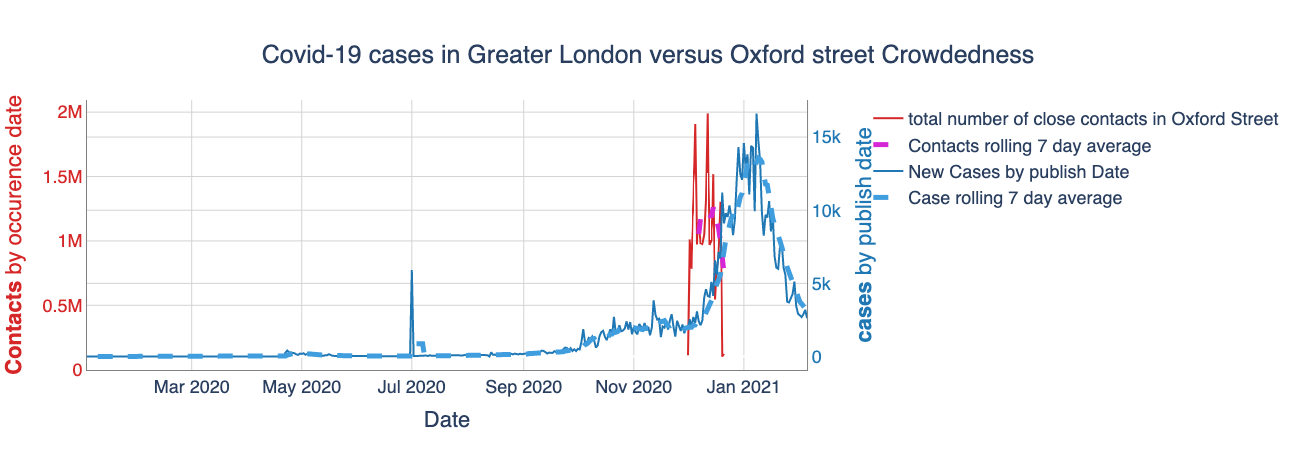

In [101]:
#Now with the cases versus deaths
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(
    x=ctcs['purchase_date'],
    y=ctcs['total_close_contacts'],
    mode='lines',
    name='total number of close contacts in Oxford Street',
    line_color="#d62728"),
    secondary_y=False   
)

#add rolling average:
fig.add_trace(go.Scatter(
    x=ctcs['purchase_date'],
    y=ctcs['ctcs_rolling_average'],
    name= 'Contacts rolling 7 day average',
    line=dict(color='#d527d6', width=5,
                              dash='dash')

),
    secondary_y=False         )

fig.add_trace(go.Scatter(
    x=df_lon['date'],
    y=df_lon['newCasesByPublishDate'],
    mode='lines',
    name='New Cases by publish Date',
    line_color='#1f77b4'),
    secondary_y = 'Secondary'

)
#add rolling average:
fig.add_trace(go.Scatter(
    x=df_lon['date'],
    y=df_lon['case_rolling_avg'],
    name='Case rolling 7 day average',
    line=dict(color='#419ede', width=5,
                              dash='dash'
              
    
    )), 
    secondary_y='Secondary'

)


fig.update_layout(title={'text': 'Covid-19 cases in Greater London versus Oxford street Crowdedness ','y':0.9,'x':0.5,'xanchor': 'center',
        'yanchor': 'top'},
                 xaxis_title='Date',
                yaxis_title='Occurences',
                font=dict(
        family="Helvetica",
        size=18,
        #color="blue"
                ),
        plot_bgcolor='rgb(255,255,255)',
                 )

fig.update_xaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.update_yaxes(
        title_text="<b>Contacts</b> by occurence date", 
        titlefont=dict(
            color="#d62728"
        ),
        tickfont=dict(
            color="#d62728"
        ),
        secondary_y=False)
fig.update_yaxes(
        title_text="<b>cases</b> by publish date",
        titlefont=dict(
            color="#1f77b4"
        ),
        tickfont=dict(
            color="#1f77b4"
        ),
        
        secondary_y=True)

iplot(fig)
fig.write_html('Covid-19casesinLondonversusoxfordstreetcrowdedness.html')

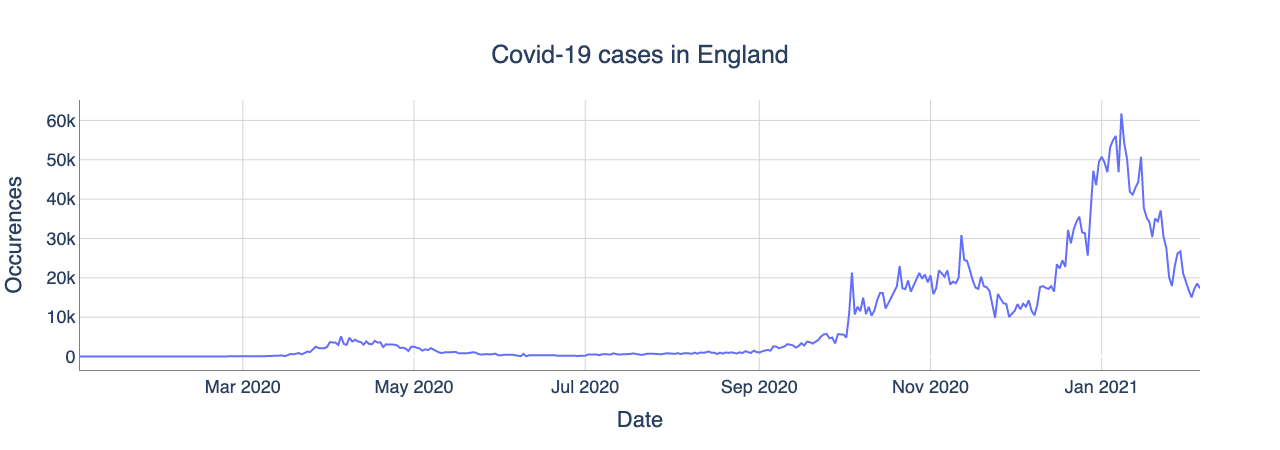

In [55]:

trace1=go.Scatter(
    x=en['date'],
    y=en['newCasesByPublishDate'],
    mode='lines',
    name='New Cases by publish Date'   
)

data=[trace1]
layout=go.Layout(title={'text': 'Covid-19 cases in England ','y':0.9,'x':0.5,'xanchor': 'center',
        'yanchor': 'top'},
                 xaxis_title='Date',
                yaxis_title='Occurences',
                font=dict(
        family="Helvetica",
        size=18,
        #color="blue"
                ),
        plot_bgcolor='rgb(255,255,255)',
                 )
fig=go.Figure(data=data, layout=layout)
fig.update_xaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
iplot(fig)

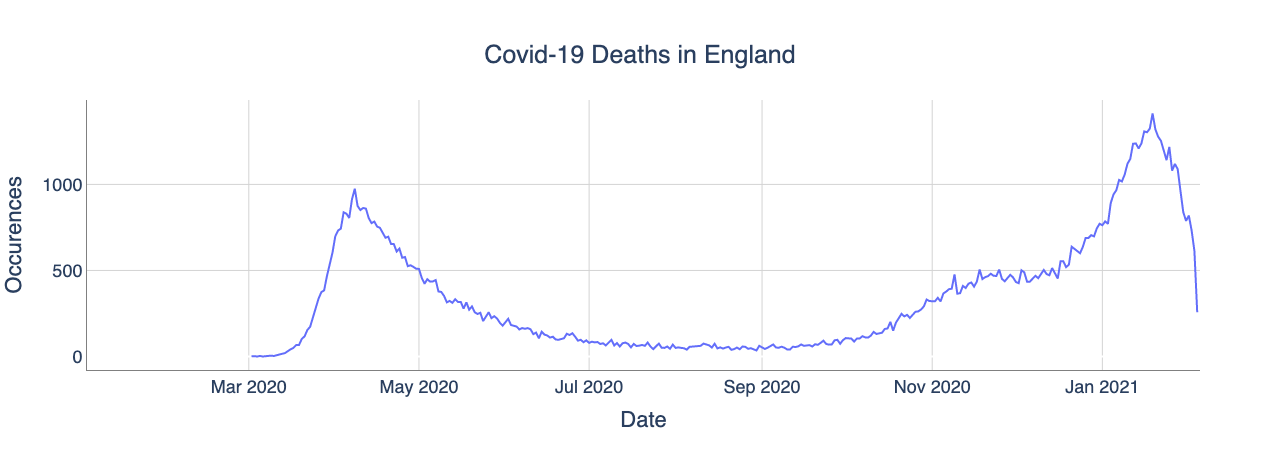

In [56]:

trace1=go.Scatter(
x=en['date'],
y=en['newDeathsByDeathDate'],
mode='lines',
name='New deaths by death date')
data=[ trace1]
layout=go.Layout(title={'text': 'Covid-19 Deaths in England','y':0.9,'x':0.5,'xanchor': 'center',
        'yanchor': 'top'},
                 xaxis_title='Date',
                yaxis_title='Occurences',
                font=dict(
        family="Helvetica",
        size=18,
        #color="blue"
                ),
        plot_bgcolor='rgb(255,255,255)',
                 )
fig=go.Figure(data=data, layout=layout)
fig.update_xaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
iplot(fig)

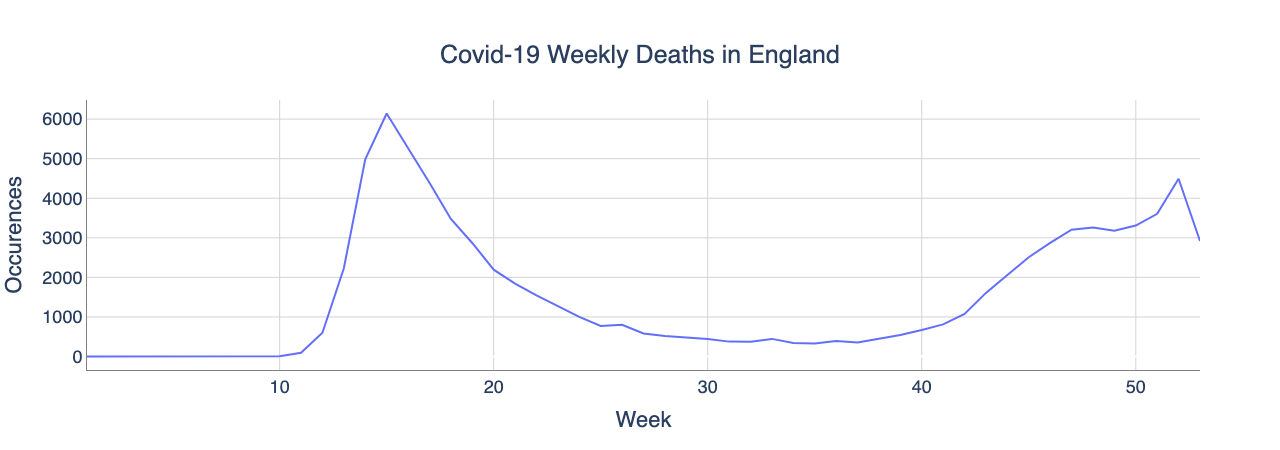

In [57]:
trace1=go.Scatter(
x=en_2020_gp['Week_number'],
y=en_2020_gp['weekly_deaths'],
mode='lines',
name='New deaths by death week')
data=[trace1]
layout=go.Layout(title={'text': 'Covid-19 Weekly Deaths in England','y':0.9,'x':0.5,'xanchor': 'center',
        'yanchor': 'top'},
                 xaxis_title='Week',
                yaxis_title='Occurences',
                font=dict(
        family="Helvetica",
        size=18,
        #color="blue"
                ),
        plot_bgcolor='rgb(255,255,255)',
                 )
fig=go.Figure(data=data, layout=layout)
fig.update_xaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
iplot(fig)

In [58]:
#compare to the excess deaths 
excess=pd.read_csv('data/excess_deaths_uk_w51.csv')
eng_excess=excess[excess['Area_Name'] == 'England']

In [59]:
eng_excess.head()

,Area_Code,Area_Name,Week_Number,reg_deaths_15,reg_deaths_16,reg_deaths_17,reg_deaths_18,reg_deaths_19,avg_reg_deaths_15_19,reg_deaths_20,Excess_2020_from_avg,estimated_2019_pop,excess_deaths_per_100t_20
15963,E92000001,England,1,11527,12218,11229,11914,10208,11419.2,11443,23.8,56286961.0,0.042283
15964,E92000001,England,2,15163,10768,12869,14106,11764,12934.0,13088,154.0,56286961.0,0.273598
15965,E92000001,England,3,13908,10741,12753,13339,11151,12378.4,12197,-181.4,56286961.0,-0.322277
15966,E92000001,England,4,13087,10613,11985,13049,10977,11942.2,11105,-837.2,56286961.0,-1.487378
15967,E92000001,England,5,12079,10342,11726,12449,10525,11424.2,10868,-556.2,56286961.0,-0.988151


In [61]:
import numpy as np
import scipy.stats as st

In [62]:
#get IC
eng_excess['IC']=eng_excess[['reg_deaths_15', 'reg_deaths_16', 'reg_deaths_17', 
                        'reg_deaths_18', 'reg_deaths_19']].apply(lambda x : st.t.interval(alpha = 0.95, df =len(x)-1, loc=np.mean(x), scale=st.sem(x)), axis=1)

<ipython-input-62-8cedbf27f18d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
#unpack IC
eng_excess[['IC_1','IC_2']]=eng_excess['IC'].apply(pd.Series)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
#rename columns to avoid confusion:
eng_excess=eng_excess.rename(columns={'IC':'CI95', 'IC_1': 'lower_CI95', 'IC_2':'upper_CI95'})

In [65]:
eng_excess=eng_excess.rename(columns={'IC_2':'upper_CI95'})

In [66]:
eng_excess.head()

,Area_Code,Area_Name,Week_Number,reg_deaths_15,reg_deaths_16,reg_deaths_17,reg_deaths_18,reg_deaths_19,avg_reg_deaths_15_19,reg_deaths_20,Excess_2020_from_avg,estimated_2019_pop,excess_deaths_per_100t_20,CI95,lower_CI95,upper_CI95
15963,E92000001,England,1,11527,12218,11229,11914,10208,11419.2,11443,23.8,56286961.0,0.042283,"(10457.870005212948, 12380.529994787054)",10457.870005,12380.529995
15964,E92000001,England,2,15163,10768,12869,14106,11764,12934.0,13088,154.0,56286961.0,0.273598,"(10747.233869104819, 15120.766130895181)",10747.233869,15120.766131
15965,E92000001,England,3,13908,10741,12753,13339,11151,12378.4,12197,-181.4,56286961.0,-0.322277,"(10667.971990083808, 14088.828009916191)",10667.971990,14088.828010
15966,E92000001,England,4,13087,10613,11985,13049,10977,11942.2,11105,-837.2,56286961.0,-1.487378,"(10521.621775540287, 13362.778224459715)",10521.621776,13362.778224
15967,E92000001,England,5,12079,10342,11726,12449,10525,11424.2,10868,-556.2,56286961.0,-0.988151,"(10254.49932897519, 12593.900671024812)",10254.499329,12593.900671


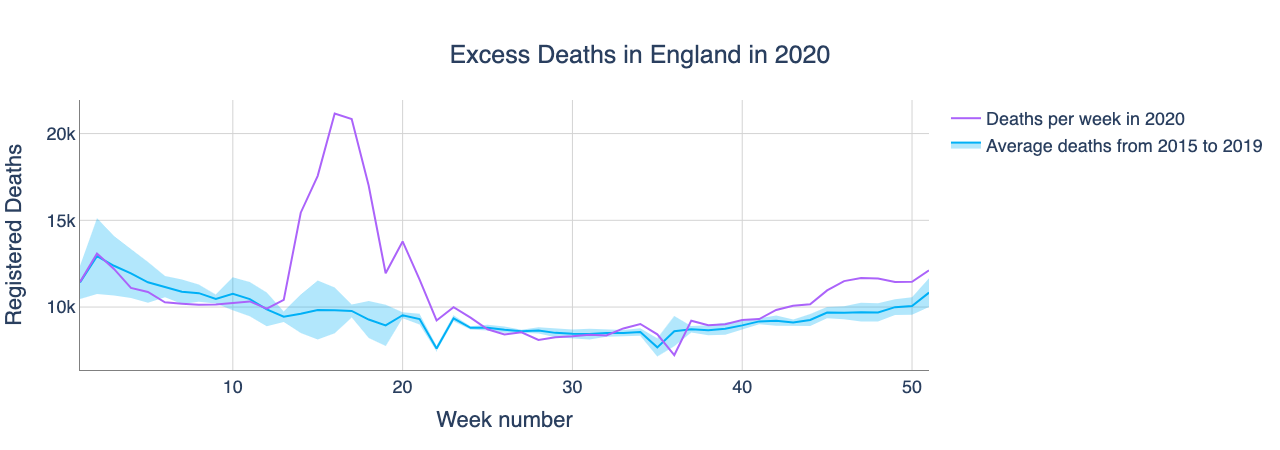

In [67]:
#now plot:
fig= go.Figure()
##line:
fig.add_trace(
    go.Scatter(
        x=eng_excess['Week_Number'],
        y=eng_excess['upper_CI95'],
        line_color='rgba(255,255,255,0)', 
        showlegend=False,
        name='upper'
)
)
fig.add_trace(go.Scatter(
        x=eng_excess['Week_Number'],
        y=eng_excess['avg_reg_deaths_15_19'],
        line_color='rgb(0,176,246)',
        fillcolor='rgba(0,176,246,0.3)',
        name='Average deaths from 2015 to 2019',
       fill='tonexty'#fill area between upper and average
))
fig.add_trace(go.Scatter(
        x=eng_excess['Week_Number'],
        y=eng_excess['lower_CI95'],
        fill='tonexty',#fill area between average and lower
        fillcolor='rgba(0,176,246,0.3)',#transparency!
        line_color='rgba(255,255,255,0)',
        showlegend=False,
        name='lower'
))
fig.add_trace(go.Scatter(
        x=eng_excess['Week_Number'],
        y=eng_excess['reg_deaths_20'],
        name='Deaths per week in 2020'
))

fig.update_traces(mode='lines')

fig.update_layout(title={'text': 'Excess Deaths in England in 2020','y':0.9,'x':0.5,'xanchor': 'center',
        'yanchor': 'top'},
                 xaxis_title='Week number',
                yaxis_title='Registered Deaths',
                font=dict(
        family="Helvetica",
        size=18,
        #color="blue"
                ),
        plot_bgcolor='rgb(255,255,255)',
                 )
fig.update_xaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
iplot(fig)

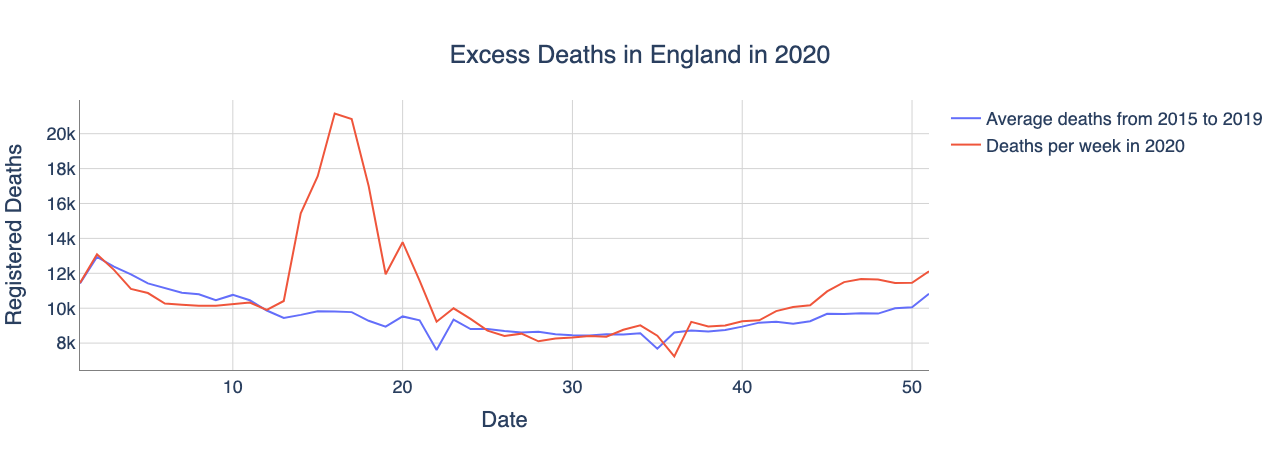

In [68]:
trace0= go.Scatter(
x=eng_excess['Week_Number'],
y=eng_excess['avg_reg_deaths_15_19'],
mode='lines',
name='Average deaths from 2015 to 2019'
)
trace1=go.Scatter(
x=eng_excess['Week_Number'],
y=eng_excess['reg_deaths_20'],
mode='lines',
name='Deaths per week in 2020')
data=[trace0, trace1]
layout=go.Layout(title={'text': 'Excess Deaths in England in 2020','y':0.9,'x':0.5,'xanchor': 'center',
        'yanchor': 'top'},
                 xaxis_title='Date',
                yaxis_title='Registered Deaths',
                font=dict(
        family="Helvetica",
        size=18,
        #color="blue"
                ),
        plot_bgcolor='rgb(255,255,255)',
                 )
fig=go.Figure(data=data, layout=layout)
fig.update_xaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
iplot(fig)

In [104]:
eng_excess.columns

Index(['Area_Code', 'Area_Name', 'Week_Number', 'reg_deaths_15',
       'reg_deaths_16', 'reg_deaths_17', 'reg_deaths_18', 'reg_deaths_19',
       'avg_reg_deaths_15_19', 'reg_deaths_20', 'Excess_2020_from_avg',
       'estimated_2019_pop', 'excess_deaths_per_100t_20'],
      dtype='object')

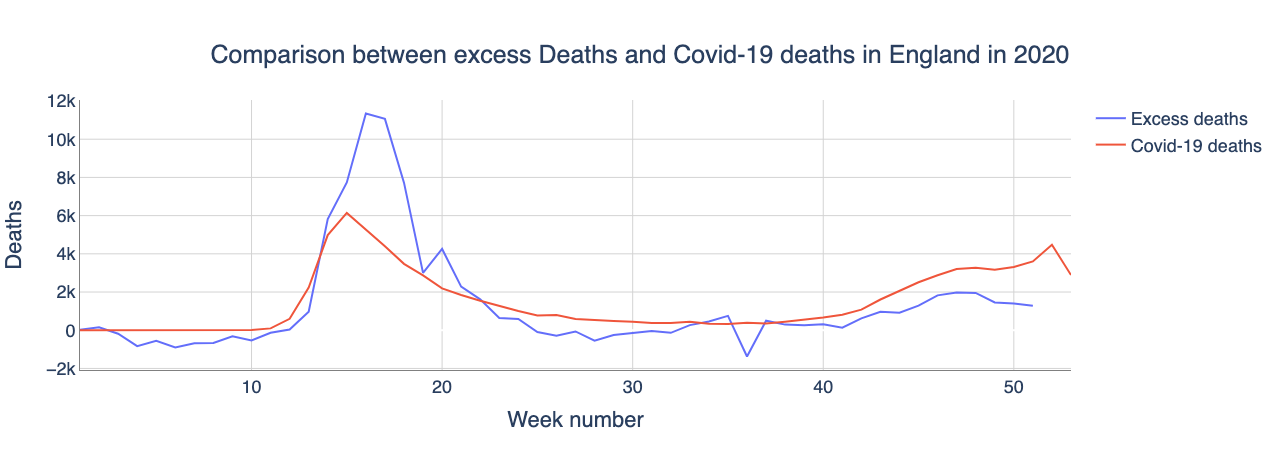

In [111]:
trace0= go.Scatter(
x=eng_excess['Week_Number'],
y=eng_excess['Excess_2020_from_avg'],
mode='lines',
name='Excess deaths'
)
trace1=go.Scatter(
x=en_2020_gp['Week_number'],
y=en_2020_gp['weekly_deaths'],
mode='lines',
name='Covid-19 deaths')
data=[trace0, trace1]
layout=go.Layout(title={'text': 'Comparison between excess Deaths and Covid-19 deaths in England in 2020','y':0.9,'x':0.5,'xanchor': 'center',
        'yanchor': 'top'},
                 xaxis_title='Week number',
                yaxis_title='Deaths',
                font=dict(
        family="Helvetica",
        size=18,
        #color="blue"
                ),
        plot_bgcolor='rgb(255,255,255)',
                 )
fig=go.Figure(data=data, layout=layout)
fig.update_xaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
iplot(fig)